In [1]:
library(ggstatsplot)
library(treemapify)
library(inspectdf)
library(tidyverse)
library(reshape2)
library(rstatix)
library(treemap)
library(ggplot2)
library(ggpubr)
library(ggsci)
library(tibble)
library(dplyr)
library(caret)
library(car)

You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘

In [2]:
Krause_database_raw <- read_rds("../data/Krause_database.rds") 

In [3]:
dim(Krause_database_raw)

[1] 2813   47

In [44]:
Krause_database <- dplyr::filter(Krause_database_raw, data_type != "Predicted from < 4 cm") |>
                   dplyr::mutate(`Stocks 30cm` = Corg.stock.30cm,
                                 `Stocks 100cm` = Corg.stock.100cm) |>
                   dplyr::mutate(`Stocks 30cm` = coalesce(Corg.stock.30cm, Pred.30cm.Corg),
                                 `Stocks 100cm` = coalesce(Corg.stock.100cm, Pred.1m.Corg))  |>
                   dplyr::filter(!is.na(`Stocks 30cm`)) 
                   
dim(Krause_database)

[1] 2153   49

In [45]:
colnames(Krause_database)

[1] "ï..Article.ID"                         
 [2] "Publication.year"                      
 [3] "Study.site"                            
 [4] "Country"                               
 [5] "Latitude"                              
 [6] "Longitude"                             
 [7] "Coastal.typology"                      
 [8] "Marine.ecoregion"                      
 [9] "Seagrass.bioregion"                    
[10] "Seagrass.functionalmorphological.group"
[11] "Seagrass.species"                      
[12] "Seagrass.genus"                        
[13] "Additional.identification"             
[14] "Above.ground.biomass"                  
[15] "Below.ground.biomass"                  
[16] "Total.biomass"                         
[17] "Sampling.depth"                        
[18] "Ctot.stock"                            
[19] "Ctot.content"                          
[20] "Corg.stock"                            
[21] "Corg.content"                          
[22] "Cinorg.stock"                          
[23] "Cinorg.content"                        
[24] "Ctot.stock.15cm"                       
[25] "Corg.stock.15cm"                       
[26] "Cinorg.stock.15cm"                     
[27] "Ctot.stock.30cm"                       
[28] "Corg.stock.30cm"                       
[29] "Cinorg.stock.30cm"                     
[30] "Ctot.stock.50cm"                       
[31] "Corg.stock.50cm"                       
[32] "Cinorg.stock.50cm"                     
[33] "Ctot.stock.100cm"                      
[34] "Corg.stock.100cm"                      
[35] "Cinorg.stock.100cm"                    
[36] "OM.content"                            
[37] "Porosity"                              
[38] "Dry.Bulk.Density"                      
[39] "Grain.size"                            
[40] "Fraction.mud"                          
[41] "Notes"                                 
[42] "Pred.30cm.Corg"                        
[43] "Pred.1m.Corg"                          
[44] "Pred.flag.30"                          
[45] "Pred.flag.100"                         
[46] "row_id"                                
[47] "data_type"                             
[48] "Stocks 30cm"                           
[49] "Stocks 100cm"

In [46]:
unique(Krause_database$Seagrass.bioregion)

[1] "Temperate Southern Oceans" "Tropical Atlantic"        
[3] "Temperate North Pacific"   "Tropical Indo-Pacific"    
[5] "Mediterranean"             "Temperate North Atlantic"

In [49]:
rstatix::get_summary_stats(Krause_database, `Stocks 30cm`)
rstatix::get_summary_stats(Krause_database, `Stocks 100cm`)

variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Stocks 30cm,2153,0.081,937.364,24.482,12.617,45.065,32.447,21.458,37.947,49.543,1.068,2.094


variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Stocks 100cm,1602,0.254,1698.392,78.419,42.869,141.104,98.236,62.558,122.002,141.727,3.541,6.945


In [50]:
Krause_database |>
dplyr::group_by(data_type) |>
dplyr::summarise(Mu_value = mean(`Stocks 30cm`))

data_type,Mu_value
<chr>,<dbl>
Measured 30cm,41.10366
Predicted from > 5 < 14 <= 15 cm,35.09506


In [52]:
Krause_database |>
dplyr::group_by(data_type) |>
summarise(Count = n())

data_type,Count
<chr>,<int>
Measured 30cm,1022
Predicted from > 5 < 14 <= 15 cm,1131


In [58]:
(Krause_regions <- Krause_database |>
                   dplyr::mutate(across(where(is.character), ~ ifelse(. == "", "Unspecified", .))) |>
                   dplyr::group_by(Seagrass.bioregion) |>
                   dplyr::summarise(total_cores = sum(!is.na(data_type))))

Seagrass.bioregion,total_cores
<chr>,<int>
Mediterranean,198
Temperate North Atlantic,390
Temperate North Pacific,92
Temperate Southern Oceans,480
Tropical Atlantic,264
Tropical Indo-Pacific,729


In [59]:
(country_counts <-  Krause_database |>
                    dplyr::filter(Seagrass.bioregion == "Temperate Southern Oceans") |>
                    dplyr::mutate(across(where(is.character), ~ ifelse(. == "", "Unspecified", .))) |>
                    dplyr::group_by(Country) |>
                    dplyr::summarise(total_cores =  sum(!is.na(data_type))))

Country,total_cores
<chr>,<int>
Australia,405
Brazil,34
Chile,3
New Zealand,3
South Africa,35


In [63]:
colnames(Krause_database)

[1] "ï..Article.ID"                         
 [2] "Publication.year"                      
 [3] "Study.site"                            
 [4] "Country"                               
 [5] "Latitude"                              
 [6] "Longitude"                             
 [7] "Coastal.typology"                      
 [8] "Marine.ecoregion"                      
 [9] "Seagrass.bioregion"                    
[10] "Seagrass.functionalmorphological.group"
[11] "Seagrass.species"                      
[12] "Seagrass.genus"                        
[13] "Additional.identification"             
[14] "Above.ground.biomass"                  
[15] "Below.ground.biomass"                  
[16] "Total.biomass"                         
[17] "Sampling.depth"                        
[18] "Ctot.stock"                            
[19] "Ctot.content"                          
[20] "Corg.stock"                            
[21] "Corg.content"                          
[22] "Cinorg.stock"                          
[23] "Cinorg.content"                        
[24] "Ctot.stock.15cm"                       
[25] "Corg.stock.15cm"                       
[26] "Cinorg.stock.15cm"                     
[27] "Ctot.stock.30cm"                       
[28] "Corg.stock.30cm"                       
[29] "Cinorg.stock.30cm"                     
[30] "Ctot.stock.50cm"                       
[31] "Corg.stock.50cm"                       
[32] "Cinorg.stock.50cm"                     
[33] "Ctot.stock.100cm"                      
[34] "Corg.stock.100cm"                      
[35] "Cinorg.stock.100cm"                    
[36] "OM.content"                            
[37] "Porosity"                              
[38] "Dry.Bulk.Density"                      
[39] "Grain.size"                            
[40] "Fraction.mud"                          
[41] "Notes"                                 
[42] "Pred.30cm.Corg"                        
[43] "Pred.1m.Corg"                          
[44] "Pred.flag.30"                          
[45] "Pred.flag.100"                         
[46] "row_id"                                
[47] "data_type"                             
[48] "Stocks 30cm"                           
[49] "Stocks 100cm"

In [ ]:
Krause_database |>
dplyr::group_by()

In [64]:
# ggbarplot(Krause_database, 
#           x = "Seagrass.genus", 
#           y = "",
#           fill = "mpg_grp",           
#           color = "white",          
#           palette = "jco",            
#           sort.val = "desc",          
#           sort.by.groups = FALSE,     
#           x.text.angle = 90,          
#           ylab = "MPG z-score",
#           legend.title = "MPG Group",
#           rotate = TRUE,
#           ggtheme = theme_minimal()
#           )

In [65]:
sum(country_counts$total_cores)

[1] 480

Seagrass.bioregion,n,Percent
<chr>,<int>,<dbl>
Mediterranean,198,9.196470
Temperate North Atlantic,390,18.114259
Temperate North Pacific,92,4.273107
Temperate Southern Oceans,480,22.294473
Tropical Atlantic,264,12.261960
Tropical Indo-Pacific,729,33.859731


Saving 6.67 x 6.67 in image


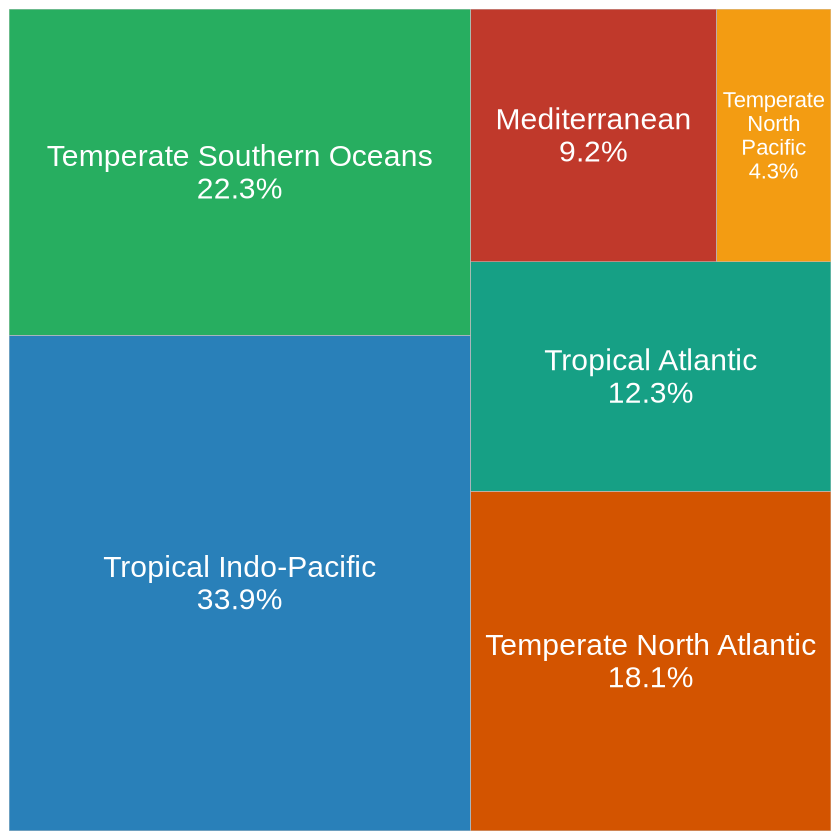

In [66]:
# Prepare data
(cat_data <- Krause_database %>%
             dplyr::mutate(Seagrass.bioregion = if_else(Seagrass.bioregion == "", "Unassigned", Seagrass.bioregion)) |>
             dplyr::count(Seagrass.bioregion) |>
             dplyr::mutate(Percent = n / sum(n) * 100))

# Tree map
tree_map <- ggplot(cat_data, aes(
                  area = Percent,
                  fill = Seagrass.bioregion,
                  label = paste0(Seagrass.bioregion, "\n", sprintf("%.1f%%", Percent)))) +
              geom_treemap() +
              geom_treemap_text(
                color = "white",
                place = "centre",
                grow = FALSE,
                reflow = TRUE) +
              theme_minimal() + theme(legend.position = "none") +
              ggsci::scale_fill_flatui()

tree_map
ggsave("../plots/Krause_represation.pdf")

In [164]:
(colour_data <- layer_data(tree_map) |> 
                dplyr::mutate(label2 = label) |>
                tidyr::separate(label2, into = c("bioregion", "percentage"), sep = "\n") |>
                dplyr::select(fill, bioregion))

fill,bioregion
<chr>,<chr>
#C0392BFF,Mediterranean
#D35400FF,Temperate North Atlantic
#F39C12FF,Temperate North Pacific
#27AE60FF,Temperate Southern Oceans
#16A085FF,Tropical Atlantic
#2980B9FF,Tropical Indo-Pacific


In [161]:
colnames(Krause_database)

[1] "ï..Article.ID"                         
 [2] "Publication.year"                      
 [3] "Study.site"                            
 [4] "Country"                               
 [5] "Latitude"                              
 [6] "Longitude"                             
 [7] "Coastal.typology"                      
 [8] "Marine.ecoregion"                      
 [9] "Seagrass.bioregion"                    
[10] "Seagrass.functionalmorphological.group"
[11] "Seagrass.species"                      
[12] "Seagrass.genus"                        
[13] "Additional.identification"             
[14] "Above.ground.biomass"                  
[15] "Below.ground.biomass"                  
[16] "Total.biomass"                         
[17] "Sampling.depth"                        
[18] "Ctot.stock"                            
[19] "Ctot.content"                          
[20] "Corg.stock"                            
[21] "Corg.content"                          
[22] "Cinorg.stock"                          
[23] "Cinorg.content"                        
[24] "Ctot.stock.15cm"                       
[25] "Corg.stock.15cm"                       
[26] "Cinorg.stock.15cm"                     
[27] "Ctot.stock.30cm"                       
[28] "Corg.stock.30cm"                       
[29] "Cinorg.stock.30cm"                     
[30] "Ctot.stock.50cm"                       
[31] "Corg.stock.50cm"                       
[32] "Cinorg.stock.50cm"                     
[33] "Ctot.stock.100cm"                      
[34] "Corg.stock.100cm"                      
[35] "Cinorg.stock.100cm"                    
[36] "OM.content"                            
[37] "Porosity"                              
[38] "Dry.Bulk.Density"                      
[39] "Grain.size"                            
[40] "Fraction.mud"                          
[41] "Notes"                                 
[42] "Pred.30cm.Corg"                        
[43] "Pred.1m.Corg"                          
[44] "Pred.flag.30"                          
[45] "Pred.flag.100"                         
[46] "row_id"                                
[47] "data_type"                             
[48] "Stocks 30cm"                           
[49] "Stocks 100cm"

In [163]:
ggbarplot(Krause_database, 
          x = "Seagrass.genus", 
          y = "",
          fill = "mpg_grp",          
          color = "white",           
          palette = "jco",            
          sort.val = "desc",          
          sort.by.groups = FALSE,     
          x.text.angle = 90,          
          ylab = "MPG z-score",
          legend.title = "MPG Group",
          rotate = TRUE,
          ggtheme = theme_minimal())

ERROR: [1m[33mError[39m in `purrr::pmap()`:[22m
[1m[22m[36mℹ[39m In index: 1.
[1mCaused by error in `[.data.frame`:[22m
[33m![39m undefined columns selected


In [ ]:
(south_ocean <-  Krause_database |>
                 dplyr::filter(Seagrass.bioregion == "Temperate Southern Oceans") |>
                 dplyr::select(Country, Seagrass.genus, Seagrass.species, data_type, `Stocks 30cm`) |>
                 dplyr::mutate(Seagrass.genus_mkup = str_replace(Seagrass.genus, " sp.","</i>sp.")) |>
                 dplyr::mutate(Seagrass.genus_mkup = paste0("<i>", Seagrass.genus_mkup)) |>
                 dplyr::mutate(Seagrass.genus_mkup = case_when(Seagrass.genus_mkup == '<i>Mixed</i> sp.' ~ 'Mixed sp.',
                               Seagrass.genus_mkup == '<i>Not</i> specified' ~ 'Not specified',
                               TRUE ~ Seagrass.genus_mkup))
) |>  head()

In [ ]:
dim(south_ocean)

In [ ]:
group_by(south_ocean, data_type) |>
summarise(N = n())

In [ ]:
head(south_ocean)

In [ ]:
dplyr::group_by(south_ocean, Country) |>
dplyr::summarise(count = sum(!is.na(data_type))) |>
dplyr::ungroup() |>
dplyr::mutate(perc = 100*(count/sum(count))) |>
dplyr::filter(count != 0)

In [ ]:
(Country_count <- dplyr::group_by(south_ocean, Country,  data_type) |>
                  dplyr::summarise(count = sum(!is.na(data_type)), y = max(`Stocks 30cm`, na.rm = TRUE)) |>
                  dplyr::ungroup() |>
                  dplyr::mutate(y_max = y*2) |>
                  dplyr::filter(count != 0))

In [ ]:
sum(Country_count$count)

In [ ]:
colnames(Krause_database)

In [ ]:
unique(Krause_database$Seagrass.genus)
length(unique(Krause_database$Seagrass.genus))

In [ ]:
sort(unique(Krause_database$Seagrass.species))
length(unique(Krause_database$Seagrass.species))

In [ ]:
Krause_database |>
dplyr::group_by(Seagrass.bioregion, Seagrass.species) |>
dplyr::summarise(N = n())

In [ ]:
country_genus <-  ggplot(south_ocean, aes(x = Country, y = `Stocks 30cm`)) +
                  geom_jitter(aes(colour = Seagrass.genus_mkup), width = 0.2, size = 1, alpha = 0.75) +
                  geom_boxplot(outlier.shape = NA, fill=NA, linewidth = 0.5,  width = 0.9) +
                  scale_y_continuous(trans = "log10", label = scales::number) +
                  geom_text(data = Country_count, aes(x = Country, y = y_max, label = count), colour = "#525252") +
                  stat_summary(fun = mean, geom = "point", 
                               shape = 23, size = 3.5, fill = "red", color = "black") +
                               ggsci::scale_color_observable(name = "Seagrass genus") + facet_wrap(~data_type, ncol = 2) +
                               theme_bw() +
                               theme(legend.text = ggtext::element_markdown())
country_genus

In [ ]:
#Change rotation of the text
#fix size
ggarrange(tree_map, country_genus, 
          labels = c("(a)", "(b)"),
          ncol = 2, nrow = 2)

ggsave("../plots/bioregion_species.pdf", width = 10, height = 5)